In [2]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

tf.random.set_seed(13)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0


In [0]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

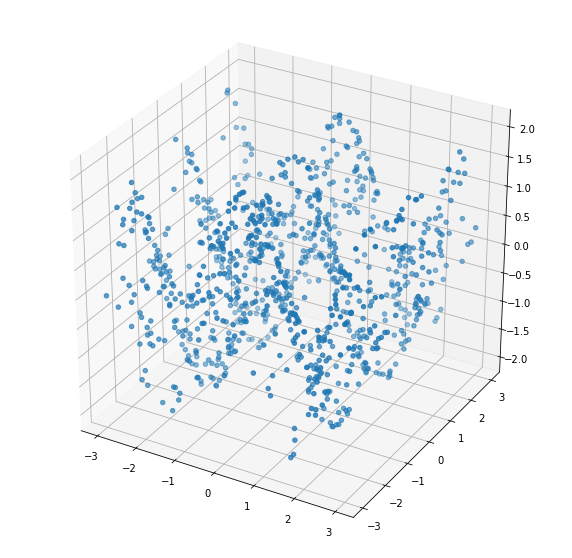

In [5]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [7]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.9551
Epoch 2/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.9057
Epoch 3/100
1000/1000 [==============================] - 0s 78us/sample - loss: 0.8796
Epoch 4/100
1000/1000 [==============================] - 0s 76us/sample - loss: 0.8546
Epoch 5/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.8946
Epoch 6/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.8092
Epoch 7/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.7983
Epoch 8/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.7221
Epoch 9/100
1000/1000 [==============================] - 0s 86us/sample - loss: 0.6459
Epoch 10/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.6026
Epoch 11/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.6711
Epoch 12/100
1000/10

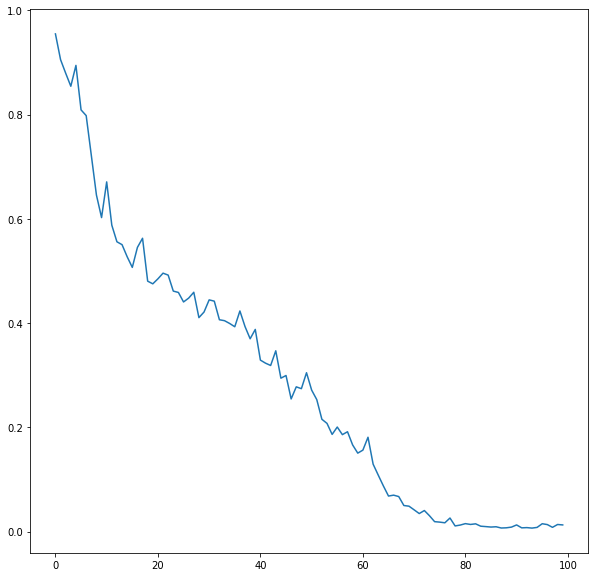

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

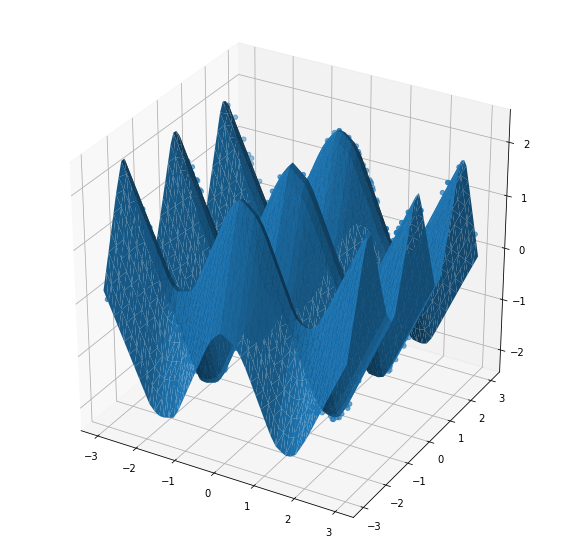

In [9]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

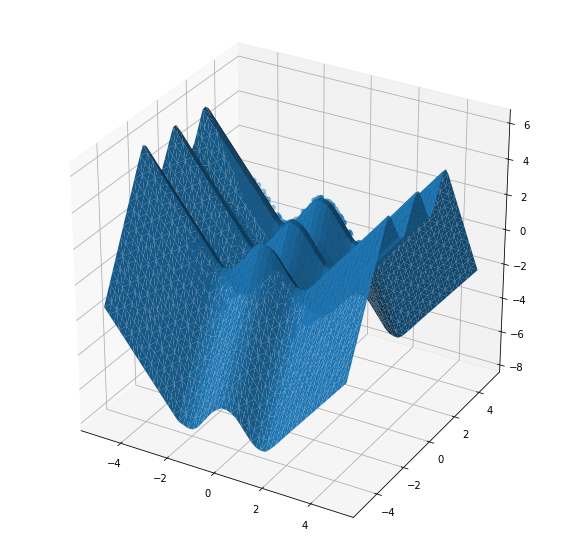

In [10]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

It doesn't extrapolate correctly. It assumes that the pattern continues going as it was going near the edges. And this is because we haven't used a periodic activation function.